# Data Cleaning
In this section, we will read the data from the csv file and store it in a pandas dataframe. Thereafter we will perform some basic data exploration to get rid of any missing values, useless columns and outliers.

In [13]:
# import all
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
import sklearn as sk


# Read the data Train on me
dataframe= pd.read_csv('Train.csv')


### Let's start with Y and x~5
Here I'm trying to interpret the data visually. X_5  column is zeroes regardless of the output. Also we we do know exactly how many unique values there are in each column. I'm going to try to find out how many unique values there are in each column. Also I am trying to find the dimensionality of each data 

In [14]:
# Find the dimensionality of the y variable
dataframe['y'].value_counts()

Dragspel       559
Nyckelharpa    231
Serpent        210
Name: y, dtype: int64

### Cleaning zero-values from the data
I found that the data had some missing values. They are now fixed in the y column and x_5 column. I also found that the x_5 column was useless. It was all zeroes. I removed it from the dataframe.

In [15]:
# Drop the entire x5 column
dataframe.drop('x5', axis=1, inplace=True)

# visualize the data
dtale.show(dataframe)


C:\Users\rakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dtale\views.py:755: FutureWarning:

['x6', 'x11', 'x12'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [16]:
# Checking x1 variable for outliers and missing values

# How many unique values are there in x1 and non values
dataframe['x1'].value_counts()
dataframe['x1'].isnull().sum()

# Find in column x1 where we get '?' and replace it with NaN
dataframe['x1'].replace('?', np.nan, inplace=True)


In [17]:
# Clean X2
dataframe['x2'].value_counts()
dataframe['x2'].isnull().sum()
dataframe['x2'].replace('?', np.nan, inplace=True)

#Clean all zeroes in x3,x4,x7,x8,x9,x10,x12,x13
dataframe['x3'].replace(0, np.nan, inplace=True)
dataframe['x4'].replace(0, np.nan, inplace=True)
dataframe['x7'].replace(0, np.nan, inplace=True)
dataframe['x8'].replace(0, np.nan, inplace=True)
dataframe['x9'].replace(0, np.nan, inplace=True)
dataframe['x10'].replace(0, np.nan, inplace=True)
dataframe['x12'].replace(0, np.nan, inplace=True)
dataframe['x13'].replace(0, np.nan, inplace=True)


In [18]:
# Looking for missspelled values in x6
dataframe['x6'].value_counts()

Slussen              296
Entrée               152
Brinnelvägen 8       125
Lindstedsvägen 24     73
KTH Biblioteket       66
Östra stationen       57
Ostra stationen        1
Name: x6, dtype: int64

In [19]:
# Where it says "Ostra stationen" in column x6, replace it with "Ostra station"
dataframe['x6'].replace('Ostra stationen', 'Östra stationen', inplace=True)
dataframe['x6'].value_counts()


Slussen              296
Entrée               152
Brinnelvägen 8       125
Lindstedsvägen 24     73
KTH Biblioteket       66
Östra stationen       58
Name: x6, dtype: int64

### Fixing Data Type conversions 
Let's use one-hot encoding to convert the categorical data into numerical data. I also found that the data had some missing values. They are now fixed in the y column and x_5 column. I also found that the x_5 column was useless. It was all zeroes. I removed it from the dataframe.

In [20]:
# One hot encoding of x6
num_dataframe = dataframe.copy()
#num_dataframe = pd.get_dummies(dataframe, columns=['x11'])    
#num_dataframe = pd.get_dummies(dataframe, columns=['x12'])

num_dataframe['x11'] = num_dataframe['x11'].str.lower().astype('bool')
num_dataframe['x12'] = num_dataframe['x12'].str.lower().astype('bool')

# Perform label encoding on x6
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
num_dataframe['x6_encoded'] = le.fit_transform(num_dataframe['x6'])
num_dataframe['y_encoded'] = le.fit_transform(num_dataframe['y'])

num_dataframe.dtypes


y              object
x1             object
x2            float64
x3            float64
x4            float64
x6             object
x7            float64
x8            float64
x9            float64
x10           float64
x11              bool
x12              bool
x13           float64
x6_encoded      int32
y_encoded       int32
dtype: object

# Data Exploration and Visualization
In this section, we will explore the data and try to find some interesting patterns. We will also try to visualize the data to get a better understanding of the data.

## Finding correlations between the data

### Correlation between the data
Correlation is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information. We will use the Pearson Correlation here

C:\Users\rakin\AppData\Local\Temp\ipykernel_12812\256523109.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\rakin\AppData\Local\Temp\ipykernel_12812\256523109.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

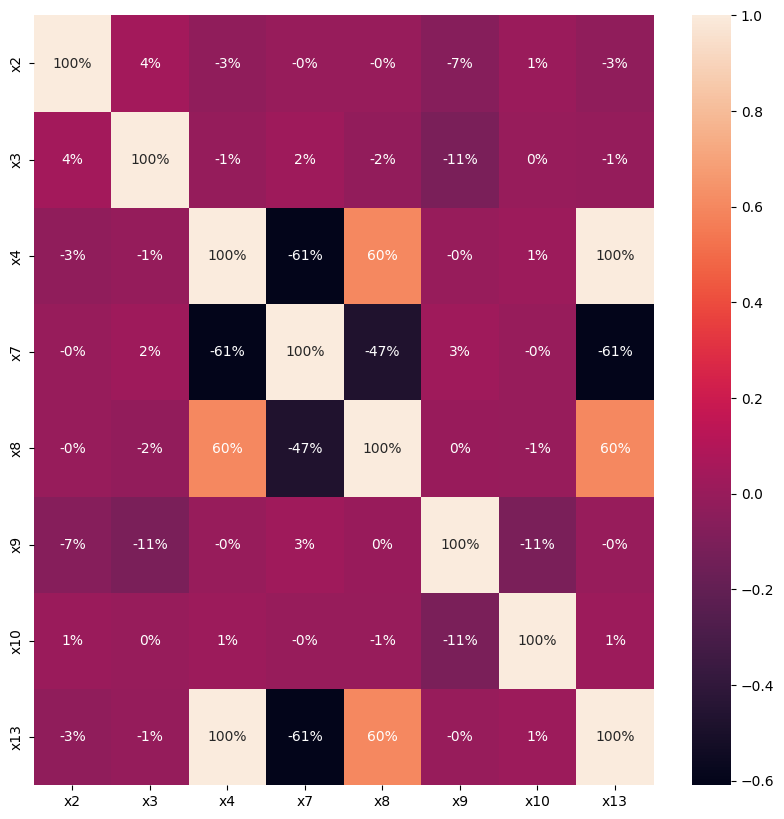

In [21]:
# Do a correlation matrix
dataframe.corr()

# Plotting the heat map
plt.figure(figsize=(10,10))
sns.heatmap(dataframe.corr(), annot=True, fmt='.0%')

We found that
- x3 and x9 are somewhat correlated
- x4, x7 together with x8 are highly correlated
- x7, x13 together with x8 are strongly negatively correlated
- x8 and x13 are strongly correlated

Let's dive more into specific data points x4,x7,x13,x8. as they are strongly correlated with each other.

C:\Users\rakin\AppData\Local\Temp\ipykernel_12812\2770685975.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

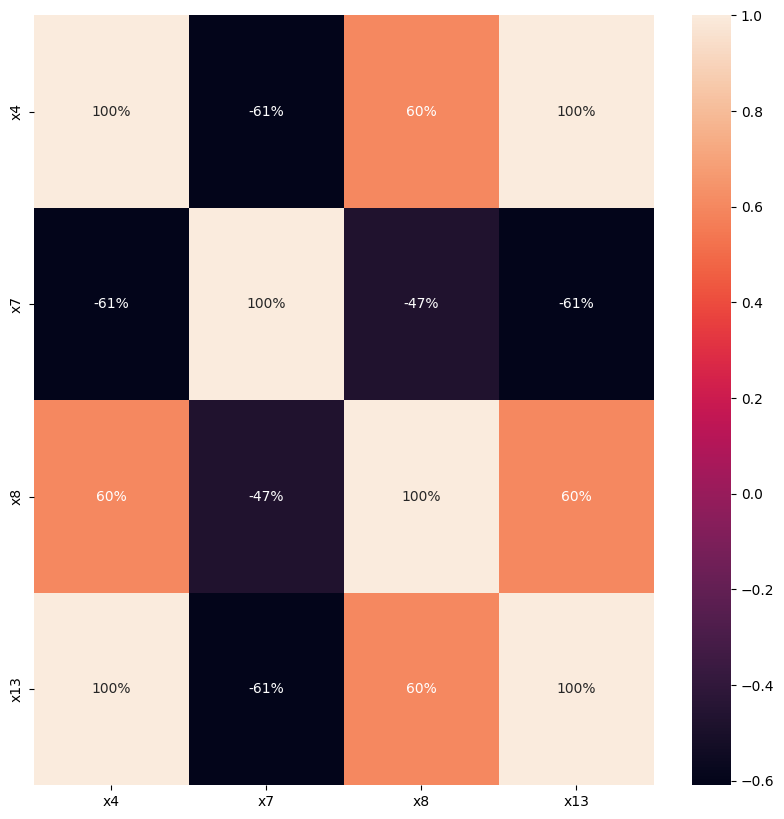

In [22]:
# Let's check x4,x7,x8 and x13 for correlation with eachother and with y
plt.figure(figsize=(10,10))
correlation_X = dataframe[['x4','x7','x8','x13','y']].copy()

sns.heatmap(correlation_X.corr(), annot=True, fmt='.0%')


C:\Users\rakin\AppData\Local\Temp\ipykernel_12812\353235328.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

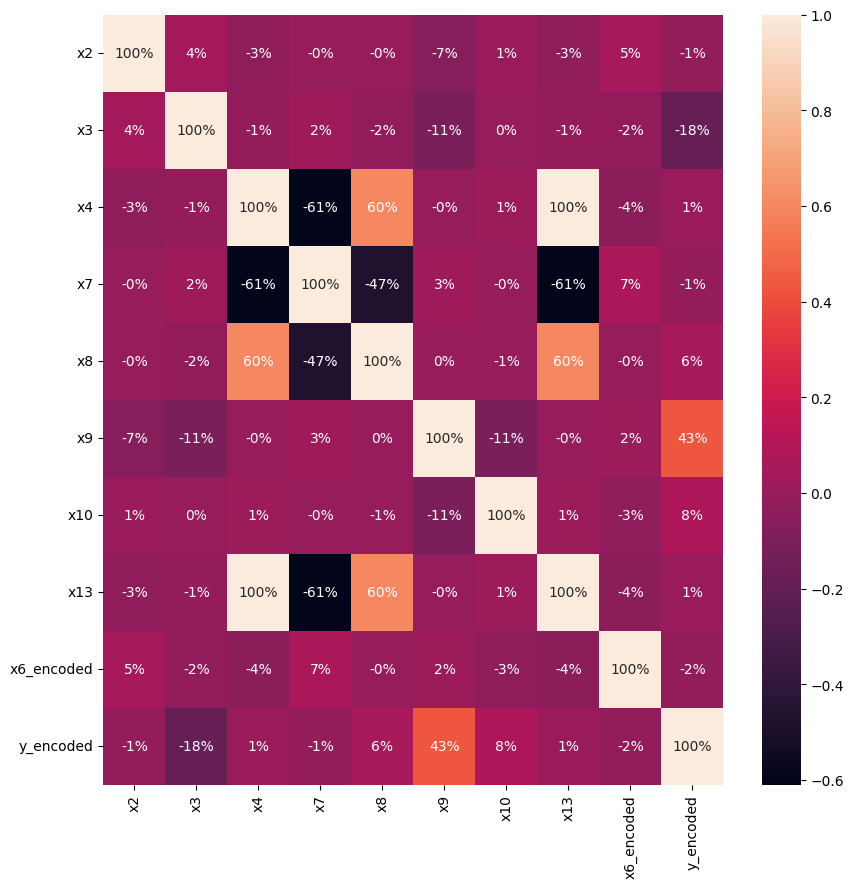

In [23]:
# Do a correlation matrix again on Y and the encoded variables
test_dataframe = num_dataframe.copy()

test_dataframe.drop(['x6','y','x11','x12'], axis=1, inplace=True)

# Plotting the heat map
plt.figure(figsize=(10,10))
sns.heatmap(test_dataframe.corr(), annot=True, fmt='.0%')

### PCA analysis for dimensionality reduction

In [24]:
# Let's do a PCA on the data
from sklearn.decomposition import PCA

PCA_test = test_dataframe.copy().dropna()

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(PCA_test)

principalDf = pd.DataFrame(data = principalComponents
              , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

principalDf.head()



,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-1.219439e+19,-1.003009e+16,36.925439,-0.093057,-1.302385
1,-1.219439e+19,-1.003009e+16,-135.552013,2.698282,2.217380
2,-1.219439e+19,-1.003009e+16,36.138088,1.030580,1.013075
3,-1.219439e+19,-1.003009e+16,-64.140631,-1.727238,-0.560598
4,-1.219439e+19,-1.003009e+16,-138.686113,-0.698720,-0.323698


# Let's try a decision tree
There seems to be a lot of correlation between the data. Let's try to use a decision tree to see if we can get a better result. First let's remove the Nans from the data. Then we will use the decision tree to predict the data.

Decision trees are good 

In [25]:
# Remove all the Nan values
non_NA_num_dataframe = num_dataframe.dropna()

In [26]:
## Do a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into train and test
X = non_NA_num_dataframe.drop(['y','x6','y_encoded'], axis=1)
y = non_NA_num_dataframe['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a decision tree
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=2)
tree.fit(X_train, y_train)

# Predict the test set
y_pred = tree.predict(X_test)

# Calculate the accuracy
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

# Do a cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X, y, cv=10)
print('Cross-validation scores: {}'.format(scores))
print ('Mean cross-validation score: {:.2f}'.format(scores.mean()))
print ('Standard deviation: {:.2f}'.format(scores.std()))
print('\n')


Accuracy: 0.72
Cross-validation scores: [0.67532468 0.76623377 0.67532468 0.61038961 0.7012987  0.58441558
 0.67532468 0.66233766 0.68831169 0.75      ]
Mean cross-validation score: 0.68
Standard deviation: 0.05




## Let's try a random forest
Random forests can be used for both classification and regression. They are a type of ensemble learning method, where a group of weak models combine to form a powerful model. Random forests are a type of ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees. They perform better than regular decision trees and can lead to a significant reduction in error. 

In [27]:
# Do a random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)

# Predict the test set
y_pred = forest.predict(X_test)

# Calculate the accuracy
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

# Do a cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest, X, y, cv=10)
print('Cross-validation scores: {}'.format(scores))
print ('Mean cross-validation score: {:.2f}'.format(scores.mean()))
print ('Standard deviation: {:.2f}'.format(scores.std()))
print('\n')

Accuracy: 0.74
Cross-validation scores: [0.74025974 0.71428571 0.68831169 0.72727273 0.74025974 0.64935065
 0.64935065 0.7012987  0.71428571 0.72368421]
Mean cross-validation score: 0.70
Standard deviation: 0.03




In [ ]:
# Optimize the random forest from the grid search

forest = RandomForestClassifier(criterion="entropy",max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=0)

# Do a cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest, X, y, cv=5)
print('Cross-validation scores: {}'.format(scores))
print ('Mean cross-validation score: {:.2f}'.format(scores.mean()))
print ('Standard deviation: {:.2f}'.format(scores.std()))
print('\n')

